<h3> Esame 24 january 2024 </h3>

<p> Punto 1) Calcolare con il metodo hit or miss il valore che deve assumere A affinche la pdf f(x) sia correttamente normalizzata</p>

<p> Punto 2)  Si generi un insieme di 10 000  numeri casuali x_i distribuiti secondo la pdf f(x) utilizzando il metodo try and catch </p>

<p> Punto 3) Si mostri in un istogramma la distribuzione degli eventi generati </p>

<p> Punto 4) Si calcolino,apartire dagli eventi generati,la media,deviazione standard,asimmetria e curtosi della distribuzione implementando le funzioni corrispondenti. </p>

1.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.642e+05 (χ²/ndof = 5474.0)│              Nfcn = 63               │
│ EDM = 8.82e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.2513   │  0.0024   │  -0.0024   │   0.0024   │         │         │       │
│ 1 │ sigma │  0.2394   │  0.0017   │  -0.0017   │   0.0018   │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0024  │  0.0024   │  -0.0017  │  0.0018   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 5.91e-06        0 │
│ sigma │        0 3.05e-06 │
└───────┴───────────────────┘

associated p-value:  0.0
the event sample is compatible with a Gaussian distribution


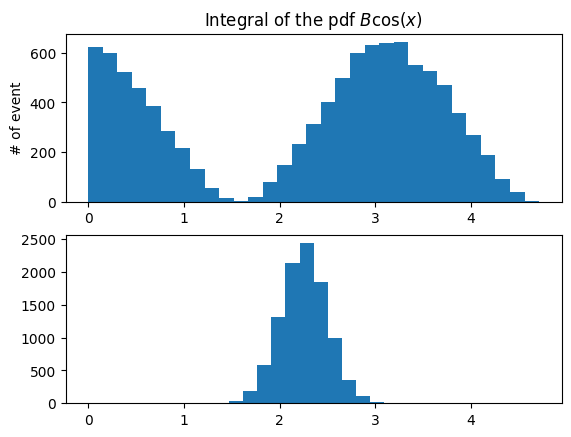

In [28]:
from math import cos,pi,ceil
from integration import integral_HOM
from myrand import generate_TAC, rand_TAC
import numpy as np
import stats as stats
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy.stats import expon, norm
from iminuit.cost import ExtendedBinnedNLL
import random
from scipy.stats import chi2


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def randTCL_pdf(pdf,xmin,xmax,ymax,N_sum = 10):
    y = 0.
    for i in range(N_sum):
       y = y + rand_TAC(pdf,xmin,xmax,ymax)[0] 
    z = y/N_sum
    return z



def generateTCL_pdf(pdf,xmin,xmax,ymax,N_sum = 10,sample_size = 10,seed = 0.):

    if seed != 0. : random.seed(float(seed))
    randlist = []
   
    for j in range(N_sum):
      
      randlist.append(randTCL_pdf(pdf,xmin,xmax,ymax,sample_size))

    return randlist 

#
# This function define the cdf of the normal distribution, it's the fitting model for the minuit library
#
def mod_gauss(bin_edges,mu,sigma): 
    return norm.cdf(bin_edges,mu,sigma)

def main():
    
    # Point 1) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    xmin = 0. 
    xmax = 1.5*pi
    

    f = lambda x : cos(x)**2

    B = integral_HOM(f,xmin,xmax,1.,50)[0]

    A = 1/B

    # We estimate the value of the integral of cos^2(x) without the costant A and after this we recalculate the integral of the function B*cos^2(x), in this way the pdf is normalized
    
    pdf = lambda x : A*cos(x)**2

    integral = integral_HOM(pdf,xmin,xmax,A,50)[0] 

    print(integral)

# Point 2)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    NToys = 10000

    ymax = A

    sample =  generate_TAC(pdf,xmin,xmax,ymax, NToys)[0]


# Point 3)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    

    nbins = sturges(sample)

    bins_edges = np.linspace(xmin,xmax,nbins)
    fig, (ax1,ax2) = plt.subplots(2,1)

    ax1.hist(sample,bins = bins_edges)
    ax1.set_title('Integral of the pdf ' + r'$B\cos(x)$')
    ax1.set_xlabel('x')
    ax1.set_ylabel('# of event')
    
# Point 4)  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    measure = stats.stats(sample)

    sampleMean = measure.mean()
    SampleSigma = measure.sigma() # it's the standard deviation of the sample
    SampleSkew = measure.skew() # it's the assimetry of  the sample 
    SampleKurt = measure.kurt()

# Point 5) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    sample_size = 32
    sampleGauss = generateTCL_pdf(pdf,xmin,xmax,ymax,NToys,sample_size) # we have generated a random sample of the mean value of sample with 32 measurement 
    
    N_bins = sturges(sampleGauss)

    my_stats_gauss = stats.stats(sampleGauss)

    bin_content, bin_edges = np.histogram (sampleGauss, bins = N_bins, range = (xmin,xmax))
    
    my_cost_func = ExtendedBinnedNLL (bin_content, bin_edges, mod_gauss)


    my_minuit = Minuit(my_cost_func, mu = my_stats_gauss.mean(), sigma = my_stats_gauss.sigma())

    my_minuit.migrad ()
    my_minuit.minos ()
    
    ax2.hist(sampleGauss, bins = bin_edges)

    display(my_minuit)

    
    print ('associated p-value: ', 1. - chi2.cdf (my_minuit.fval, df = my_minuit.ndof))
    if 1. - chi2.cdf (my_minuit.fval, df = my_minuit.ndof) > 0.10:
        print('the event sample is compatible with a Gaussian distribution')
    else:
        print('the event sample is compatible with a Gaussian distribution')


if __name__ == "__main__": main()